In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [2]:
# link files 
housing_csv = Path("../data/cleaned (3).csv")
income_csv = Path("../data/income_city.csv")
locations_csv = Path("../data/uscities.csv")

#Convert so the CSV files can be read
housingData = pd.read_csv(housing_csv, low_memory=False)
incomeData = pd.read_csv(income_csv, encoding='ISO-8859-1')
locationsData = pd.read_csv(locations_csv)

## find the average housing price of each city in each state

In [3]:
housingData["price"].dropna()

0         589500.0
1          99999.0
2         405000.0
3         130000.0
4          20000.0
            ...   
529117    210000.0
529118    350000.0
529119    859000.0
529120    465000.0
529121    310000.0
Name: price, Length: 529122, dtype: float64

In [4]:
housingData['price'] = pd.to_numeric(housingData['price'], errors='coerce')

In [5]:
print(housingData['price'].apply(type).value_counts())

price
<class 'float'>    529122
Name: count, dtype: int64


In [6]:

CA_housing = housingData[(housingData["state"] == "CA")]
WA_housing = housingData[(housingData["state"] == "WA")]
CO_housing = housingData[(housingData["state"] == "CO")]
AK_housing = housingData[(housingData["state"] == "AK")]

NM_housing = housingData[(housingData["state"] == "NM")]
AR_housing = housingData[(housingData["state"] == "AR")]
ID_housing = housingData[(housingData["state"] == "ID")]
LA_housing = housingData[(housingData["state"] == "LA")]


In [7]:
NM_housing.dtypes

property_url           object
property_id             int64
address                object
street_name            object
apartment              object
city                   object
state                  object
latitude              float64
longitude             float64
postcode               object
price                 float64
bedroom_number        float64
bathroom_number       float64
price_per_unit        float64
living_space          float64
land_space            float64
land_space_unit        object
broker_id             float64
property_type          object
property_status        object
year_build            float64
total_num_units       float64
listing_age             int64
RunDate                object
agency_name            object
agent_name            float64
agent_phone           float64
is_owned_by_zillow      int64
dtype: object

In [8]:
len(NM_housing)

10207

In [9]:
CA_housing["city_lower"] = CA_housing["city"].str.lower()
WA_housing["city_lower"] = WA_housing["city"].str.lower()
CO_housing["city_lower"] = CO_housing["city"].str.lower()
AK_housing["city_lower"] = AK_housing["city"].str.lower()
NM_housing["city_lower"] = NM_housing["city"].str.lower()
AR_housing["city_lower"] = AR_housing["city"].str.lower()
ID_housing["city_lower"] = ID_housing["city"].str.lower()
LA_housing["city_lower"] = LA_housing["city"].str.lower()

# Update the city names in the original DataFrame using .loc
CA_housing["city"] = CA_housing["city_lower"]
WA_housing["city"] = WA_housing["city_lower"]
CO_housing["city"] = CO_housing["city_lower"]
AK_housing["city"] = AK_housing["city_lower"]
NM_housing["city"] = NM_housing["city_lower"]
AR_housing["city"] = AR_housing["city_lower"]
ID_housing["city"] = ID_housing["city_lower"]
LA_housing["city"] = LA_housing["city_lower"]

# Drop the temporary "city_lower" column
CA_housing.drop(columns=["city_lower"], inplace=True)
WA_housing.drop(columns=["city_lower"], inplace=True)
CO_housing.drop(columns=["city_lower"], inplace=True)
AK_housing.drop(columns=["city_lower"], inplace=True)
NM_housing.drop(columns=["city_lower"], inplace=True)
AR_housing.drop(columns=["city_lower"], inplace=True)
ID_housing.drop(columns=["city_lower"], inplace=True)
LA_housing.drop(columns=["city_lower"], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5956\1350140589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_housing["city_lower"] = CA_housing["city"].str.lower()
C:\Users\user\AppData\Local\Temp\ipykernel_5956\1350140589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WA_housing["city_lower"] = WA_housing["city"].str.lower()
C:\Users\user\AppData\Local\Temp\ipykernel_5956\1350140589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [10]:
CA_avgPrice = CA_housing.groupby("city")["price"].mean().round(2)
WA_avgPrice = WA_housing.groupby("city")["price"].mean().round(2)
CO_avgPrice = CO_housing.groupby("city")["price"].mean().round(2)
AK_avgPrice = AK_housing.groupby("city")["price"].mean().round(2)

NM_avgPrice = NM_housing.groupby("city")["price"].mean().round(2)
AR_avgPrice = AR_housing.groupby("city")["price"].mean().round(2)
ID_avgPrice = ID_housing.groupby("city")["price"].mean().round(2)
LA_avgPrice = LA_housing.groupby("city")["price"].mean().round(2)

city_avgPrice = {
    "CA": CA_avgPrice.reset_index().set_index("city")["price"].to_dict(),
    "WA": WA_avgPrice.reset_index().set_index("city")["price"].to_dict(),
    "CO": CO_avgPrice.reset_index().set_index("city")["price"].to_dict(),
    "AK": AK_avgPrice.reset_index().set_index("city")["price"].to_dict(),
    "NM": NM_avgPrice.reset_index().set_index("city")["price"].to_dict(),
    "AR": AR_avgPrice.reset_index().set_index("city")["price"].to_dict(),
    "ID": ID_avgPrice.reset_index().set_index("city")["price"].to_dict(),
    "LA": LA_avgPrice.reset_index().set_index("city")["price"].to_dict()
}

city_avgPrice_json = json.dumps(city_avgPrice, indent=4)

print(city_avgPrice_json)

{
    "CA": {
        "29 palms": 68970.53,
        "acampo": 762796.57,
        "acton": 704409.13,
        "adelaide": 1890300.0,
        "adelanto": 330053.21,
        "adin": 441944.44,
        "agoura hills": 1457051.42,
        "agua dulce": 1149721.7,
        "aguanga": 298430.58,
        "ahwahnee": 426491.18,
        "alameda": 1121272.61,
        "alamo": 4364938.69,
        "albany": 1018970.86,
        "albion": 962818.18,
        "alderpoint": 217222.22,
        "alhambra": 1021538.51,
        "aliso viejo": 946978.4,
        "alpaugh": 8559900.0,
        "alpine": 1026568.82,
        "alpine meadows": 2033500.0,
        "alpine village": 150000.0,
        "alta": 373254.45,
        "alta loma": 835285.78,
        "altadena": 1349019.42,
        "alturas": 104850.81,
        "alviso": 1225000.0,
        "amador city": 327000.0,
        "amboy": 42500.0,
        "american canyon": 1002626.67,
        "anaheim": 950574.16,
        "anderson": 542865.38,
        "angels camp"

In [11]:

# Specify the file path where you want to save the JSON file
output_file_path = "city_avgPrice.json"

# Save the JSON string to a file
with open(output_file_path, 'w') as file:
    file.write(city_avgPrice_json)

## find the average income of each city in each state

In [12]:
incomeData["Mean"].dropna()

0        38773
1        37725
2        54606
3        63919
4        77948
         ...  
32521    30649
32522    15520
32523    41933
32524        0
32525    28049
Name: Mean, Length: 32526, dtype: int64

In [13]:
incomeData['Mean'] = pd.to_numeric(incomeData['Mean'], errors='coerce')

In [14]:
print(incomeData['Mean'].apply(type).value_counts())

Mean
<class 'int'>    32526
Name: count, dtype: int64


In [15]:
CA_income = incomeData[(incomeData["state"] == "CA")]
WA_income = incomeData[(incomeData["state"] == "WA")]
CO_income = incomeData[(incomeData["state"] == "CO")]
AK_income = incomeData[(incomeData["state"] == "AK")]

NM_income = incomeData[(incomeData["state"] == "NM")]
AR_income = incomeData[(incomeData["state"] == "AR")]
ID_income = incomeData[(incomeData["state"] == "ID")]
LA_income = incomeData[(incomeData["state"] == "LA")]

In [16]:
CA_income["city_lower"] = CA_income["city"].str.lower()
WA_income["city_lower"] = WA_income["city"].str.lower()
CO_income["city_lower"] = CO_income["city"].str.lower()
AK_income["city_lower"] = AK_income["city"].str.lower()
NM_income["city_lower"] = NM_income["city"].str.lower()
AR_income["city_lower"] = AR_income["city"].str.lower()
ID_income["city_lower"] = ID_income["city"].str.lower()
LA_income["city_lower"] = LA_income["city"].str.lower()

# Update the city names in the original DataFrame using .loc
CA_income["city"] = CA_income["city_lower"]
WA_income["city"] = WA_income["city_lower"]
CO_income["city"] = CO_income["city_lower"]
AK_income["city"] = AK_income["city_lower"]
NM_income["city"] = NM_income["city_lower"]
AR_income["city"] = AR_income["city_lower"]
ID_income["city"] = ID_income["city_lower"]
LA_income["city"] = LA_income["city_lower"]

# Drop the temporary "city_lower" column
CA_income.drop(columns=["city_lower"], inplace=True)
WA_income.drop(columns=["city_lower"], inplace=True)
CO_income.drop(columns=["city_lower"], inplace=True)
AK_income.drop(columns=["city_lower"], inplace=True)
NM_income.drop(columns=["city_lower"], inplace=True)
AR_income.drop(columns=["city_lower"], inplace=True)
ID_income.drop(columns=["city_lower"], inplace=True)
LA_income.drop(columns=["city_lower"], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5956\2527967988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_income["city_lower"] = CA_income["city"].str.lower()
C:\Users\user\AppData\Local\Temp\ipykernel_5956\2527967988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WA_income["city_lower"] = WA_income["city"].str.lower()
C:\Users\user\AppData\Local\Temp\ipykernel_5956\2527967988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [17]:
CA_avgIncome = CA_income.groupby("city")["Mean"].mean().round(2)
WA_avgIncome = WA_income.groupby("city")["Mean"].mean().round(2)
CO_avgIncome = CO_income.groupby("city")["Mean"].mean().round(2)
AK_avgIncome = AK_income.groupby("city")["Mean"].mean().round(2)

NM_avgIncome = NM_income.groupby("city")["Mean"].mean().round(2)
AR_avgIncome = AR_income.groupby("city")["Mean"].mean().round(2)
ID_avgIncome = ID_income.groupby("city")["Mean"].mean().round(2)
LA_avgIncome = LA_income.groupby("city")["Mean"].mean().round(2)

city_avgIncome = {
    "CA": CA_avgIncome.reset_index().set_index("city")["Mean"].to_dict(),
    "WA": WA_avgIncome.reset_index().set_index("city")["Mean"].to_dict(),
    "CO": CO_avgIncome.reset_index().set_index("city")["Mean"].to_dict(),
    "AK": AK_avgIncome.reset_index().set_index("city")["Mean"].to_dict(),
    "NM": NM_avgIncome.reset_index().set_index("city")["Mean"].to_dict(),
    "AR": AR_avgIncome.reset_index().set_index("city")["Mean"].to_dict(),
    "ID": ID_avgIncome.reset_index().set_index("city")["Mean"].to_dict(),
    "LA": LA_avgIncome.reset_index().set_index("city")["Mean"].to_dict()
}

city_avgIncome_json = json.dumps(city_avgIncome, indent=4)

print(city_avgIncome_json)

{
    "CA": {
        "adelanto": 36944.0,
        "agoura": 140704.0,
        "agoura hills": 182475.0,
        "agua dulce": 91975.0,
        "aguanga": 64425.0,
        "alameda": 89726.38,
        "albany": 98633.0,
        "alhambra": 75486.22,
        "aliso viejo": 90167.0,
        "alpine": 91662.0,
        "alta": 64090.67,
        "alta loma": 98738.17,
        "altadena": 88514.0,
        "alviso": 87293.0,
        "anaheim": 72411.0,
        "anderson": 56644.0,
        "angwin": 79252.0,
        "antelope": 71078.0,
        "antioch": 60612.5,
        "anza": 67770.0,
        "apple valley": 62031.4,
        "aptos": 72422.4,
        "arcadia": 82843.6,
        "arcata": 40289.0,
        "arleta": 68519.0,
        "arroyo grande": 76230.67,
        "artesia": 76899.0,
        "arvin": 53026.0,
        "atascadero": 62049.0,
        "atherton": 149965.0,
        "atwater": 63003.5,
        "auburn": 89314.67,
        "avalon": 76075.0,
        "avenal": 0.0,
        "avery"

## Merge Housing Prices and Income to turn into JSON file

In [18]:
with open("city_avgPrice.json", 'r') as f:
    cities_home_prices = json.load(f)

extracted_prices = []

for state, cities_data in cities_home_prices.items():
    for city, price in cities_data.items():
        extracted_prices.append({
            'state': state,
            'city': city,
            'Average Price': price
        })

for item in extracted_prices:
    print(f"State: {item['state']}, City: {item['city']}, Average Price: {item['Average Price']}")

housing_df = pd.DataFrame(extracted_prices)
housing_df

State: CA, City: 29 palms, Average Price: 68970.53
State: CA, City: acampo, Average Price: 762796.57
State: CA, City: acton, Average Price: 704409.13
State: CA, City: adelaide, Average Price: 1890300.0
State: CA, City: adelanto, Average Price: 330053.21
State: CA, City: adin, Average Price: 441944.44
State: CA, City: agoura hills, Average Price: 1457051.42
State: CA, City: agua dulce, Average Price: 1149721.7
State: CA, City: aguanga, Average Price: 298430.58
State: CA, City: ahwahnee, Average Price: 426491.18
State: CA, City: alameda, Average Price: 1121272.61
State: CA, City: alamo, Average Price: 4364938.69
State: CA, City: albany, Average Price: 1018970.86
State: CA, City: albion, Average Price: 962818.18
State: CA, City: alderpoint, Average Price: 217222.22
State: CA, City: alhambra, Average Price: 1021538.51
State: CA, City: aliso viejo, Average Price: 946978.4
State: CA, City: alpaugh, Average Price: 8559900.0
State: CA, City: alpine, Average Price: 1026568.82
State: CA, City: a

,state,city,Average Price
0,CA,29 palms,68970.53
1,CA,acampo,762796.57
2,CA,acton,704409.13
3,CA,adelaide,1890300.00
4,CA,adelanto,330053.21
...,...,...,...
3543,LA,woodworth,148142.86
3544,LA,worthington hills,130000.00
3545,LA,youngsville,331443.28
3546,LA,zachary,337333.95


In [19]:
with open('city_avgIncome.json', 'r') as f:
    cities_average_incomes = json.load(f)

extracted_income = []

for state, cities_data in cities_average_incomes.items():
    for city, value in cities_data.items():
        extracted_income.append({
            'state': state,
            'city': city,
            'Average Income': value
        })

# Print or process the extracted income data
for item in extracted_income:
    print(f"State: {item['state']}, City: {item['city']}, Average Income: {item['Average Income']}")

extracted_income



State: CA, City: adelanto, Average Income: 36944.0
State: CA, City: agoura, Average Income: 140704.0
State: CA, City: agoura hills, Average Income: 182475.0
State: CA, City: agua dulce, Average Income: 91975.0
State: CA, City: aguanga, Average Income: 64425.0
State: CA, City: alameda, Average Income: 89726.38
State: CA, City: albany, Average Income: 98633.0
State: CA, City: alhambra, Average Income: 75486.22
State: CA, City: aliso viejo, Average Income: 90167.0
State: CA, City: alpine, Average Income: 91662.0
State: CA, City: alta, Average Income: 64090.67
State: CA, City: alta loma, Average Income: 98738.17
State: CA, City: altadena, Average Income: 88514.0
State: CA, City: alviso, Average Income: 87293.0
State: CA, City: anaheim, Average Income: 72411.0
State: CA, City: anderson, Average Income: 56644.0
State: CA, City: angwin, Average Income: 79252.0
State: CA, City: antelope, Average Income: 71078.0
State: CA, City: antioch, Average Income: 60612.5
State: CA, City: anza, Average In

[{'state': 'CA', 'city': 'adelanto', 'Average Income': 36944.0},
 {'state': 'CA', 'city': 'agoura', 'Average Income': 140704.0},
 {'state': 'CA', 'city': 'agoura hills', 'Average Income': 182475.0},
 {'state': 'CA', 'city': 'agua dulce', 'Average Income': 91975.0},
 {'state': 'CA', 'city': 'aguanga', 'Average Income': 64425.0},
 {'state': 'CA', 'city': 'alameda', 'Average Income': 89726.38},
 {'state': 'CA', 'city': 'albany', 'Average Income': 98633.0},
 {'state': 'CA', 'city': 'alhambra', 'Average Income': 75486.22},
 {'state': 'CA', 'city': 'aliso viejo', 'Average Income': 90167.0},
 {'state': 'CA', 'city': 'alpine', 'Average Income': 91662.0},
 {'state': 'CA', 'city': 'alta', 'Average Income': 64090.67},
 {'state': 'CA', 'city': 'alta loma', 'Average Income': 98738.17},
 {'state': 'CA', 'city': 'altadena', 'Average Income': 88514.0},
 {'state': 'CA', 'city': 'alviso', 'Average Income': 87293.0},
 {'state': 'CA', 'city': 'anaheim', 'Average Income': 72411.0},
 {'state': 'CA', 'city':

In [20]:
income_df = pd.DataFrame(extracted_income)
income_df

,state,city,Average Income
0,CA,adelanto,36944.0
1,CA,agoura,140704.0
2,CA,agoura hills,182475.0
3,CA,agua dulce,91975.0
4,CA,aguanga,64425.0
...,...,...,...
8597,LA,winnfield,38288.0
8598,LA,winnsboro,22506.0
8599,LA,youngsville,103089.5
8600,LA,zachary,79647.0


In [21]:
pricingincome_data = housing_df.merge(income_df, how="inner", on=["state","city"])
pricingincome_data.head()

print(len(pricingincome_data))

1493


# clean up locations data to merge with other dataframes

In [22]:
locationsData.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11080.3,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3184.7,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4614.5,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4758.9,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1384.0,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [23]:
locationsData.columns

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [24]:
locationsData = pd.DataFrame(locationsData)

In [25]:
locationsData.rename(columns={'state_id': 'state'}, inplace=True)

locationsData.head()


,city,city_ascii,state,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11080.3,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3184.7,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4614.5,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4758.9,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1384.0,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [26]:
# isolate state, city, lat, lng to merge with the combined dataframe

location_selection = locationsData[["state_name","state","city","lat","lng"]]

location_selection["city_lower"] = location_selection["city"].str.lower()


# Update the city names in the original DataFrame using .loc
location_selection["city"] = location_selection["city_lower"]


# Drop the temporary "city_lower" column
location_selection.drop(columns=["city_lower"], inplace=True)


location_selection.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5956\2392851844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_selection["city_lower"] = location_selection["city"].str.lower()
C:\Users\user\AppData\Local\Temp\ipykernel_5956\2392851844.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_selection["city"] = location_selection["city_lower"]
C:\Users\user\AppData\Local\Temp\ipykernel_5956\2392851844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,state_name,state,city,lat,lng
0,New York,NY,new york,40.6943,-73.9249
1,California,CA,los angeles,34.1141,-118.4068
2,Illinois,IL,chicago,41.8375,-87.6866
3,Florida,FL,miami,25.7840,-80.2101
4,Texas,TX,houston,29.7860,-95.3885


In [27]:
merged_data = pricingincome_data.merge(location_selection, how="inner", on=["state","city"])
merged_data.head()

print(len(merged_data))

1382


In [28]:
merged_data["Average Income"].max()

242857.0

In [29]:
merged_data.head()

,state,city,Average Price,Average Income,state_name,lat,lng
0,CA,adelanto,330053.21,36944.00,California,34.5814,-117.4397
1,CA,agoura hills,1457051.42,182475.00,California,34.1510,-118.7609
2,CA,agua dulce,1149721.70,91975.00,California,34.5044,-118.3160
3,CA,aguanga,298430.58,64425.00,California,33.4522,-116.8555
4,CA,alameda,1121272.61,89726.38,California,37.7668,-122.2670


In [93]:
# add a column to show the perccentge difference between income and salary
merged_data['Price to Income Ratio'] = merged_data['Average Price'] / merged_data['Average Income']
merged_data.head()

,state,city,Average Price,Average Income,state_name,lat,lng,Price to Income Ratio,Income Range
0,CA,adelanto,330053.21,36944.00,California,34.5814,-117.4397,8.933879,20000-50000
1,CA,agoura hills,1457051.42,182475.00,California,34.1510,-118.7609,7.984937,170000+
2,CA,agua dulce,1149721.70,91975.00,California,34.5044,-118.3160,12.500372,80000-110000
3,CA,aguanga,298430.58,64425.00,California,33.4522,-116.8555,4.632217,50000-80000
4,CA,alameda,1121272.61,89726.38,California,37.7668,-122.2670,12.496577,80000-110000


In [94]:
# create bins to sort the incomes
incomeRanges_bins = [0, 20000, 50000, 80000, 110000, 114000, 117000,100000000]
incomeRanges_labels = ["0-20000","20000-50000","50000-80000","80000-110000","110000-140000","140000-170000","170000+"]

merged_data["Income Range"] = pd.cut(merged_data["Average Income"], bins=incomeRanges_bins, labels = incomeRanges_labels)

merged_data.head()

,state,city,Average Price,Average Income,state_name,lat,lng,Price to Income Ratio,Income Range
0,CA,adelanto,330053.21,36944.00,California,34.5814,-117.4397,8.933879,20000-50000
1,CA,agoura hills,1457051.42,182475.00,California,34.1510,-118.7609,7.984937,170000+
2,CA,agua dulce,1149721.70,91975.00,California,34.5044,-118.3160,12.500372,80000-110000
3,CA,aguanga,298430.58,64425.00,California,33.4522,-116.8555,4.632217,50000-80000
4,CA,alameda,1121272.61,89726.38,California,37.7668,-122.2670,12.496577,80000-110000


In [95]:
merged_data['Income Range'].value_counts()

Income Range
50000-80000      686
20000-50000      321
80000-110000     260
170000+           77
110000-140000     19
140000-170000      8
0-20000            6
Name: count, dtype: int64

In [96]:
json_data = merged_data.to_json(orient='records', indent=4)

# Specify the file path where you want to save the JSON file
output_merged_path = "incomevsprice.json"

# Write the JSON data to a file
with open(output_merged_path, 'w') as file:
    file.write(json_data)

# Data Visualization

In [97]:
# link files 
jsonData = Path("./incomevsprice.json")

#Convert so the CSV files can be read

incomevsprice = pd.read_json(jsonData)

In [98]:
len(incomevsprice)

1382

In [99]:
incomevsprice = incomevsprice.dropna()

In [100]:
len(incomevsprice)

1377

In [101]:
# seperate by each state: 
# HCOL: CA, WA, CO, AK
# LCOL: NM, AR, ID, LA

CA_data = incomevsprice[(incomevsprice["state"] == "CA")]
WA_data = incomevsprice[(incomevsprice["state"] == "WA")]
CO_data = incomevsprice[(incomevsprice["state"] == "CO")]
AK_data = incomevsprice[(incomevsprice["state"] == "AK")]

NM_data = incomevsprice[(incomevsprice["state"] == "NM")]
AR_data = incomevsprice[(incomevsprice["state"] == "AR")]
ID_data = incomevsprice[(incomevsprice["state"] == "ID")]
LA_data = incomevsprice[(incomevsprice["state"] == "LA")]
LA_data


,state,city,Average Price,Average Income,state_name,lat,lng,Price to Income Ratio,Income Range
1211,LA,abbeville,162241.54,30647.00,Louisiana,29.9751,-92.1265,5.293880,20000-50000
1212,LA,alexandria,239628.79,61826.43,Louisiana,31.2923,-92.4702,3.875831,50000-80000
1213,LA,arabi,215110.00,47335.00,Louisiana,29.9562,-89.9986,4.544417,20000-50000
1214,LA,arcadia,128082.67,19998.00,Louisiana,32.5506,-92.9218,6.404774,0-20000
1215,LA,avondale,157649.67,40873.00,Louisiana,29.9072,-90.1933,3.857061,20000-50000
...,...,...,...,...,...,...,...,...,...
1377,LA,winnfield,123142.71,38288.00,Louisiana,31.9240,-92.6425,3.216222,20000-50000
1378,LA,winnsboro,206161.76,22506.00,Louisiana,32.1650,-91.7210,9.160302,20000-50000
1379,LA,youngsville,331443.28,103089.50,Louisiana,30.0963,-91.9968,3.215102,80000-110000
1380,LA,zachary,337333.95,79647.00,Louisiana,30.6643,-91.1634,4.235363,50000-80000


## Scatter Plot

The r-squared is: 0.2004458417538349
 The correlation between average yearly income and average home price sales is 0.45


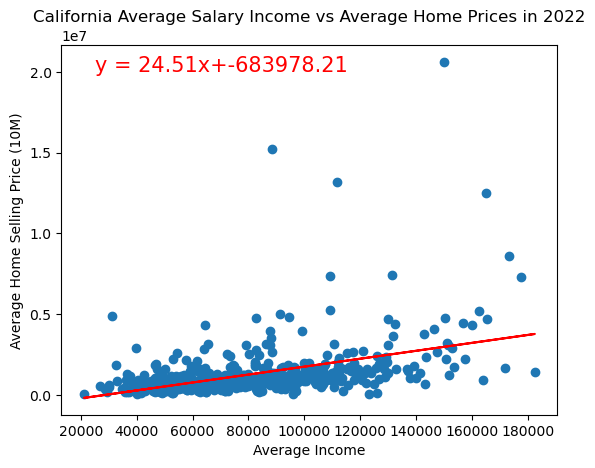

In [132]:
# # Let's do each state seperately
# CA =  California
# WA = Washington
# AK = Alaska
# CO = Colorado
# NM = New Mexico
# AR = Arkansas
# ID = Idaho
# LA = Loiusiana 

import scipy.stats as st
# Switch each state abbreviation for each state's graph + change title name with state name 

xvalues_CA = CA_data["Average Income"]
yvalues_CA = CA_data["Average Price"]

plt.scatter(xvalues_CA, yvalues_CA)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues_CA, yvalues_CA)
regress_vals = xvalues_CA * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues_CA,regress_vals, "r-")
plt.annotate(line_eq, (25000,20000000), fontsize=15, color="red")

plt.title("California Average Salary Income vs Average Home Prices in 2022")
plt.xlabel("Average Income")
plt.ylabel("Average Home Selling Price (10M)")

plt.savefig('./images/LA_scatter.png')

correlation = st.pearsonr(xvalues_CA,yvalues_CA)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between average yearly income and average home price sales is {round(correlation[0],2)}")

plt.savefig('./images/CA_scatter.png')

plt.show()

The r-squared is: 0.054011319204719375
 The correlation between average yearly income and average home price sales is 0.23


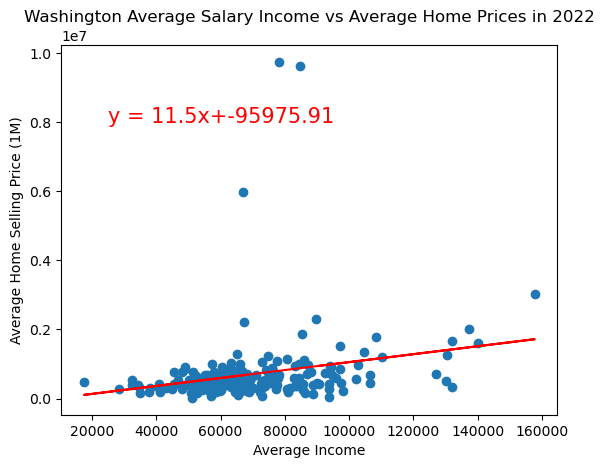

In [134]:
xvalues_WA = WA_data["Average Income"]
yvalues_WA = WA_data["Average Price"]

plt.scatter(xvalues_WA, yvalues_WA)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues_WA, yvalues_WA)
regress_vals = xvalues_WA * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues_WA,regress_vals, "r-")
plt.annotate(line_eq, (25000,8000000), fontsize=15, color="red")

plt.title("Washington Average Salary Income vs Average Home Prices in 2022")
plt.xlabel("Average Income")
plt.ylabel("Average Home Selling Price (1M)")

plt.savefig('./images/LA_scatter.png')

correlation = st.pearsonr(xvalues_WA,yvalues_WA)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between average yearly income and average home price sales is {round(correlation[0],2)}")

plt.savefig('./images/WA_scatter.png')

plt.show()

The r-squared is: 0.000987749974061556
 The correlation between average yearly income and average home price sales is -0.03


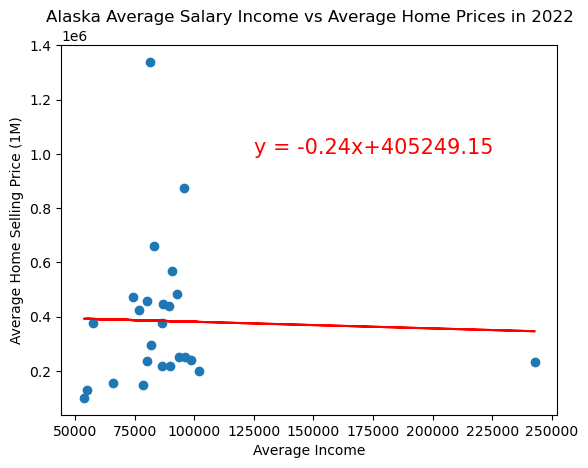

In [135]:
xvalues_AK = AK_data["Average Income"]
yvalues_AK = AK_data["Average Price"]

plt.scatter(xvalues_AK, yvalues_AK)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues_AK, yvalues_AK)
regress_vals = xvalues_AK * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues_AK,regress_vals, "r-")
plt.annotate(line_eq, (125000,1000000), fontsize=15, color="red")

plt.title("Alaska Average Salary Income vs Average Home Prices in 2022")
plt.xlabel("Average Income")
plt.ylabel("Average Home Selling Price (1M)")


correlation = st.pearsonr(xvalues_AK,yvalues_AK)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between average yearly income and average home price sales is {round(correlation[0],2)}")

plt.savefig('./images/AK_scatter.png')

plt.show()

The r-squared is: 0.06345314585417826
 The correlation between average yearly income and average home price sales is 0.25


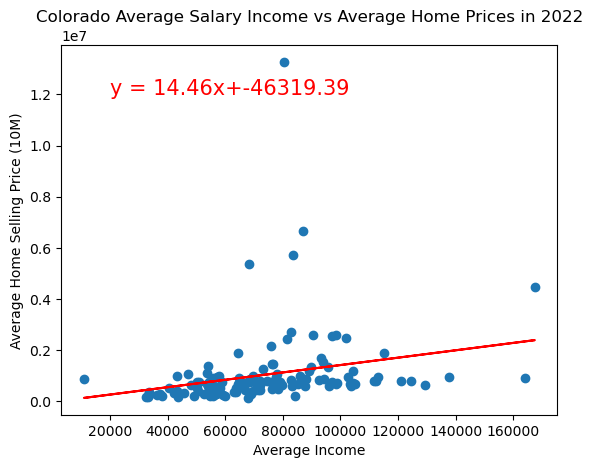

In [136]:
xvalues_CO = CO_data["Average Income"]
yvalues_CO = CO_data["Average Price"]

plt.scatter(xvalues_CO, yvalues_CO)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues_CO, yvalues_CO)
regress_vals = xvalues_CO * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues_CO,regress_vals, "r-")
plt.annotate(line_eq, (20000,12000000), fontsize=15, color="red")

plt.title("Colorado Average Salary Income vs Average Home Prices in 2022")
plt.xlabel("Average Income")
plt.ylabel("Average Home Selling Price (10M)")


correlation = st.pearsonr(xvalues_CO,yvalues_CO)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between average yearly income and average home price sales is {round(correlation[0],2)}")

plt.savefig('./images/CO_scatter.png')

plt.show()

The r-squared is: 0.13474054450946404
 The correlation between average yearly income and average home price sales is 0.37


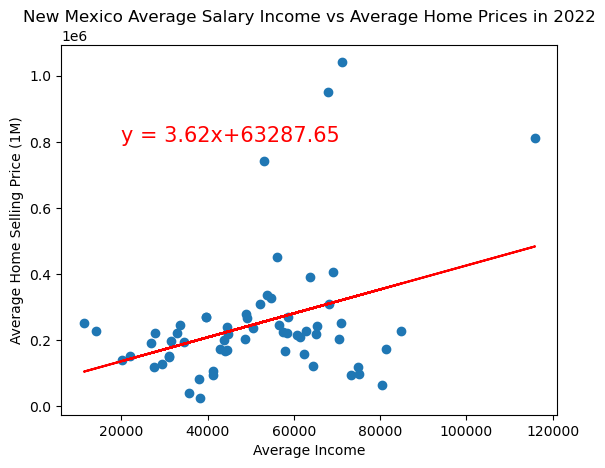

In [137]:
xvalues_NM = NM_data["Average Income"]
yvalues_NM = NM_data["Average Price"]

plt.scatter(xvalues_NM, yvalues_NM)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues_NM, yvalues_NM)
regress_vals = xvalues_NM * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues_NM,regress_vals, "r-")
plt.annotate(line_eq, (20000,800000), fontsize=15, color="red")

plt.title("New Mexico Average Salary Income vs Average Home Prices in 2022")
plt.xlabel("Average Income")
plt.ylabel("Average Home Selling Price (1M)")


correlation = st.pearsonr(xvalues_NM,yvalues_NM)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between average yearly income and average home price sales is {round(correlation[0],2)}")

plt.savefig('./images/NM_scatter.png')

plt.show()

The r-squared is: 0.16169104179402258
 The correlation between average yearly income and average home price sales is 0.4


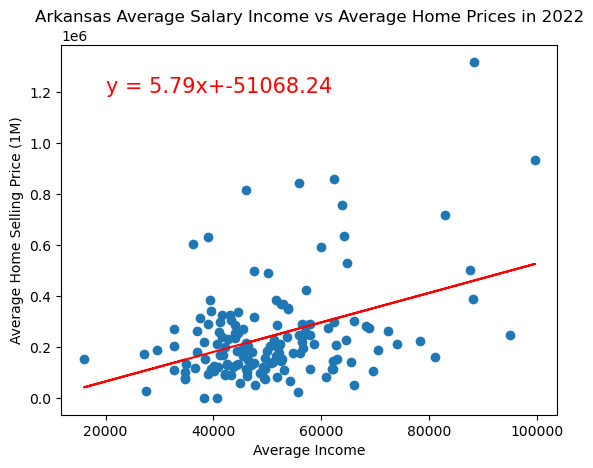

In [138]:
xvalues_AR = AR_data["Average Income"]
yvalues_AR = AR_data["Average Price"]

plt.scatter(xvalues_AR, yvalues_AR)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues_AR, yvalues_AR)
regress_vals = xvalues_AR * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues_AR,regress_vals, "r-")
plt.annotate(line_eq, (20000,1200000), fontsize=15, color="red")

plt.title("Arkansas Average Salary Income vs Average Home Prices in 2022")
plt.xlabel("Average Income")
plt.ylabel("Average Home Selling Price (1M)")


correlation = st.pearsonr(xvalues_AR,yvalues_AR)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between average yearly income and average home price sales is {round(correlation[0],2)}")

plt.savefig('./images/AR_scatter.png')

plt.show()

The r-squared is: 0.07504118858459793
 The correlation between average yearly income and average home price sales is 0.27


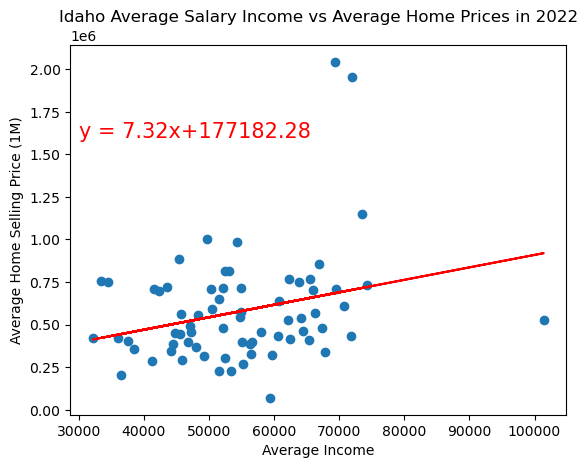

In [152]:
xvalues_ID = ID_data["Average Income"]
yvalues_ID = ID_data["Average Price"]

plt.scatter(xvalues_ID, yvalues_ID)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues_ID, yvalues_ID)
regress_vals = xvalues_ID * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues_ID,regress_vals, "r-")
plt.annotate(line_eq, (30000,1600000), fontsize=15, color="red")

plt.title("Idaho Average Salary Income vs Average Home Prices in 2022")
plt.xlabel("Average Income")
plt.ylabel("Average Home Selling Price (1M)")


correlation = st.pearsonr(xvalues_ID,yvalues_ID)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between average yearly income and average home price sales is {round(correlation[0],2)}")

plt.savefig('./images/ID_scatter.png')

plt.show()

The r-squared is: 0.18821691492216422
 The correlation between average yearly income and average home price sales is 0.43


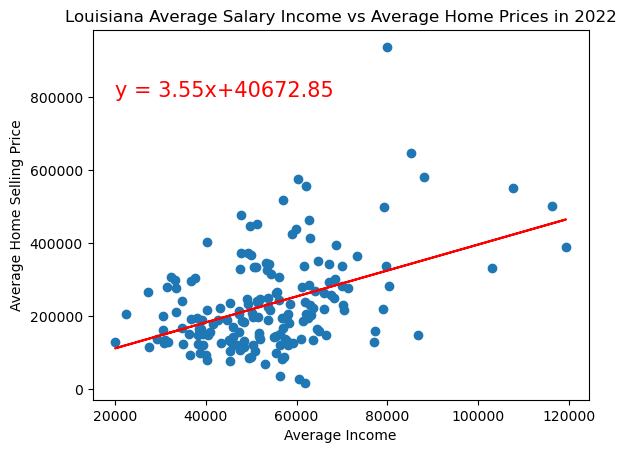

In [86]:
xvalues_LA = LA_data["Average Income"]
yvalues_LA = LA_data["Average Price"]

plt.scatter(xvalues_LA, yvalues_LA)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues_LA, yvalues_LA)
regress_vals = xvalues_LA * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvalues_LA,regress_vals, "r-")
plt.annotate(line_eq, (20000,800000), fontsize=15, color="red")

plt.title("Louisiana Average Salary Income vs Average Home Prices in 2022")
plt.xlabel("Average Income")
plt.ylabel("Average Home Selling Price")


correlation = st.pearsonr(xvalues_LA,yvalues_LA)
print(f"The r-squared is: {rvalue**2}")
print(f" The correlation between average yearly income and average home price sales is {round(correlation[0],2)}")

plt.savefig('./images/LA_scatter.png')

plt.show()

## Data Sorting Histograms

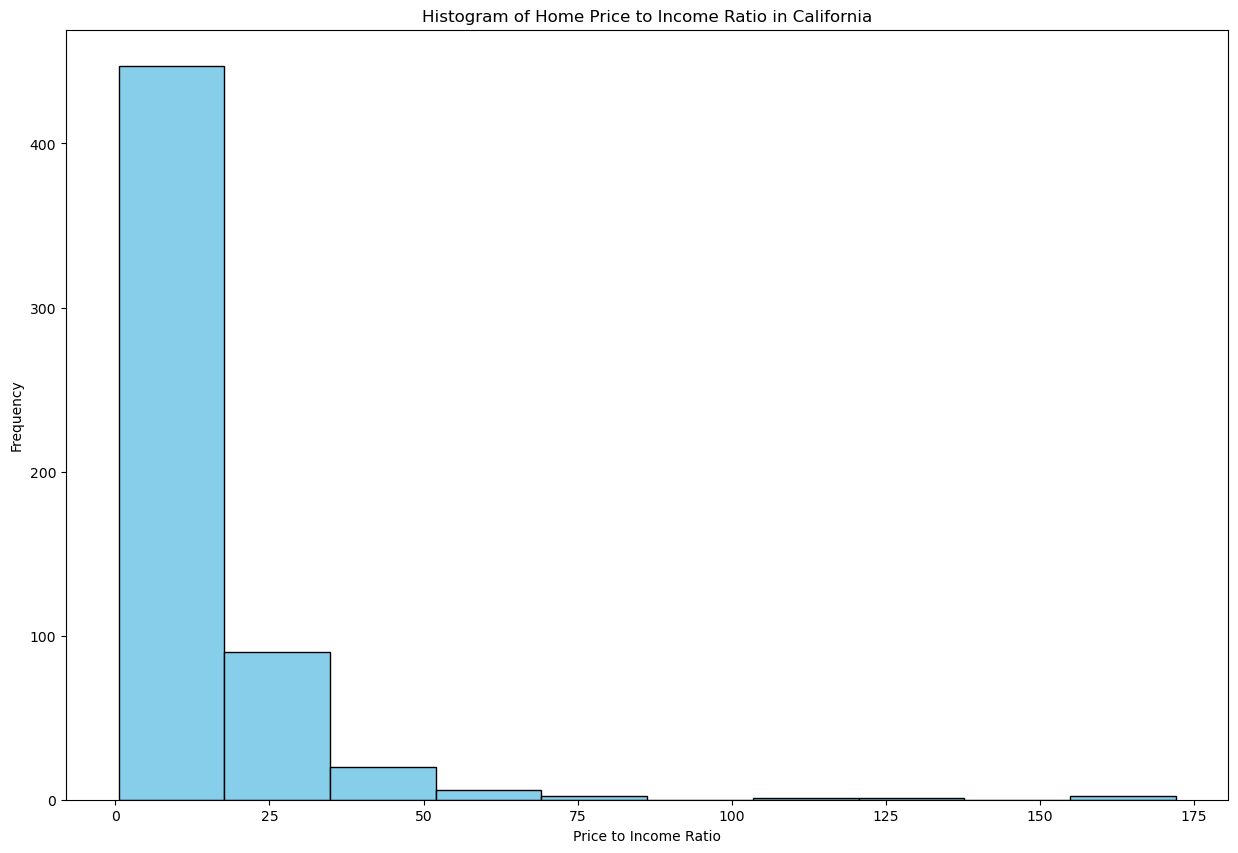

In [107]:
plt.figure(figsize=(15, 10))
plt.hist(CA_data["Price to Income Ratio"], bins=10, color='skyblue', edgecolor='black', align='mid')  

plt.xlabel('Price to Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Home Price to Income Ratio in California')

plt.savefig('./images/CA_histo.png')

plt.show()

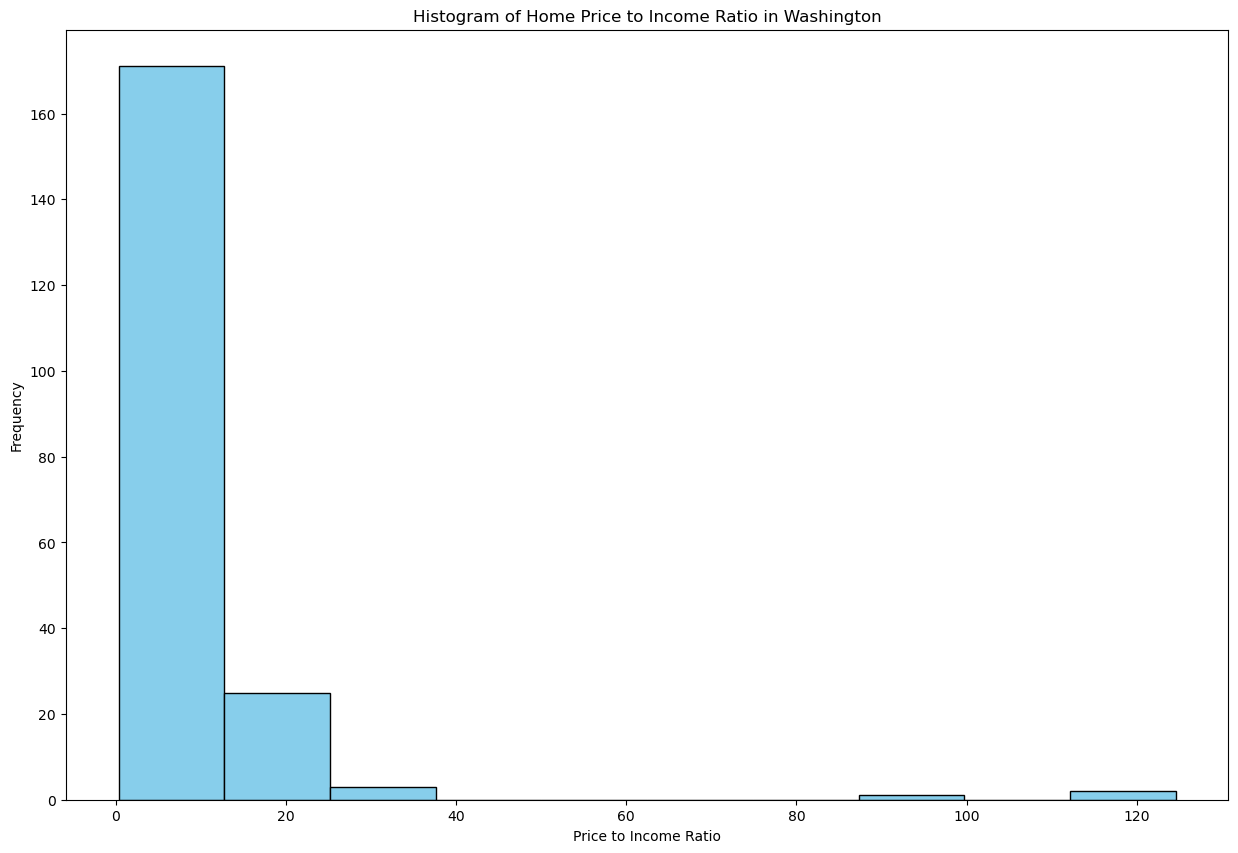

In [108]:
plt.figure(figsize=(15, 10))
plt.hist(WA_data["Price to Income Ratio"], bins=10, color='skyblue', edgecolor='black', align='mid')  

plt.xlabel('Price to Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Home Price to Income Ratio in Washington')

plt.savefig('./images/WA_histo.png')

plt.show()

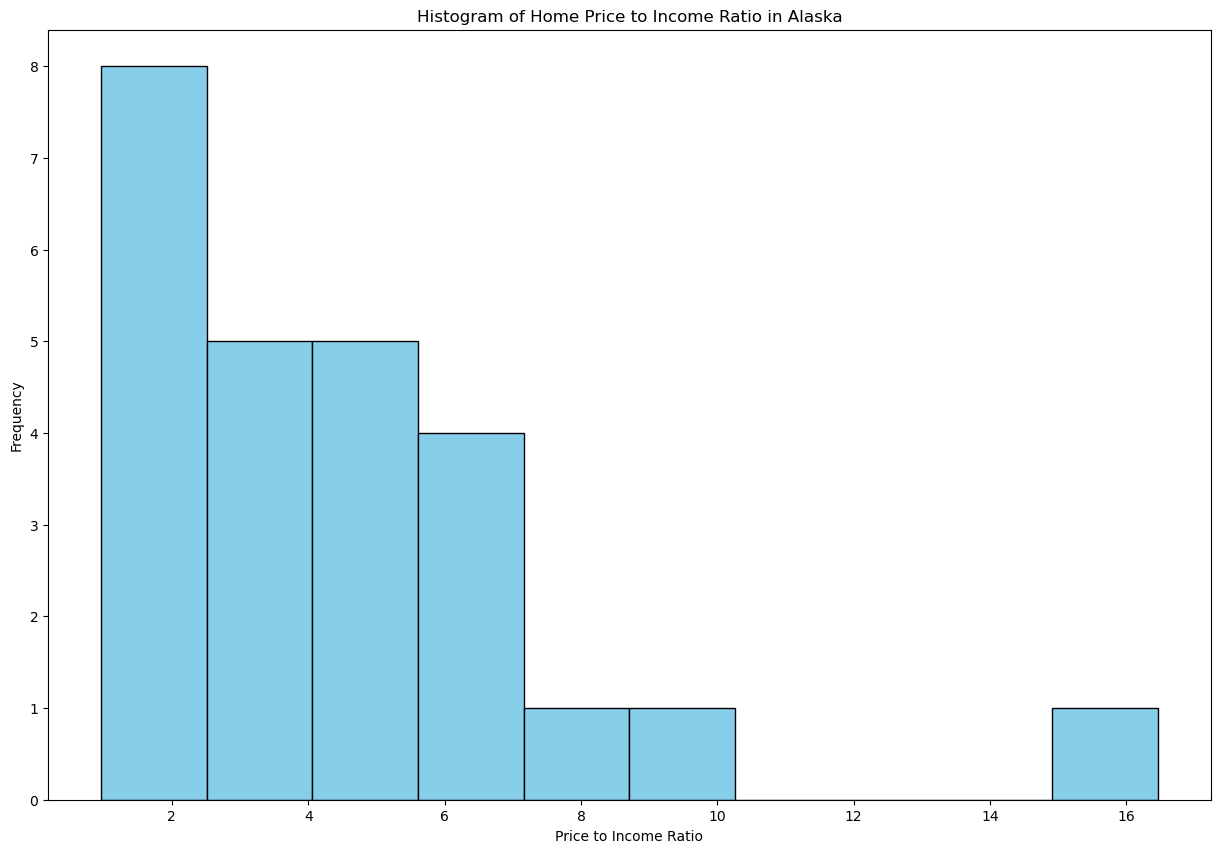

In [109]:
plt.figure(figsize=(15, 10))
plt.hist(AK_data["Price to Income Ratio"], bins=10, color='skyblue', edgecolor='black', align='mid')  

plt.xlabel('Price to Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Home Price to Income Ratio in Alaska')

plt.savefig('./images/AK_histo.png')

plt.show()

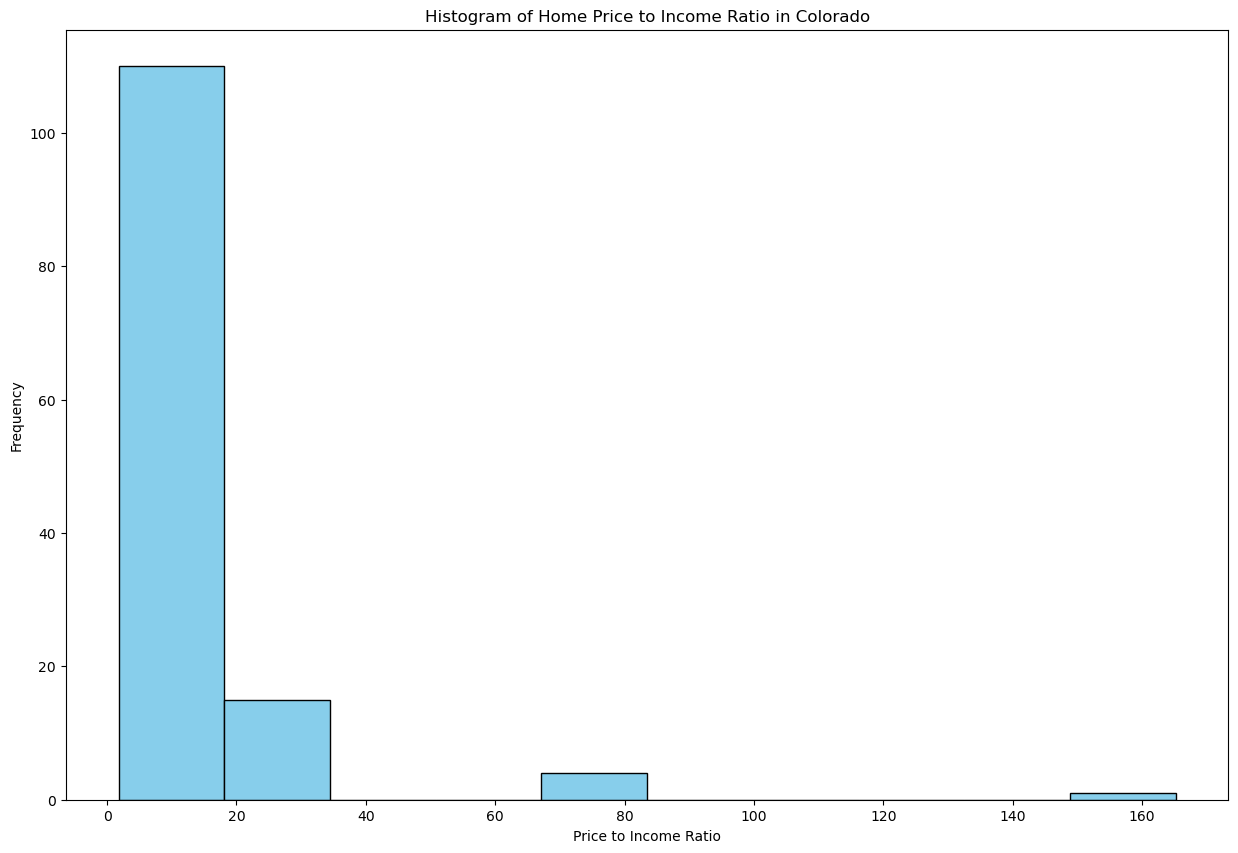

In [110]:
plt.figure(figsize=(15, 10))
plt.hist(CO_data["Price to Income Ratio"], bins=10, color='skyblue', edgecolor='black', align='mid')  

plt.xlabel('Price to Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Home Price to Income Ratio in Colorado')

plt.savefig('./images/CO_histo.png')

plt.show()

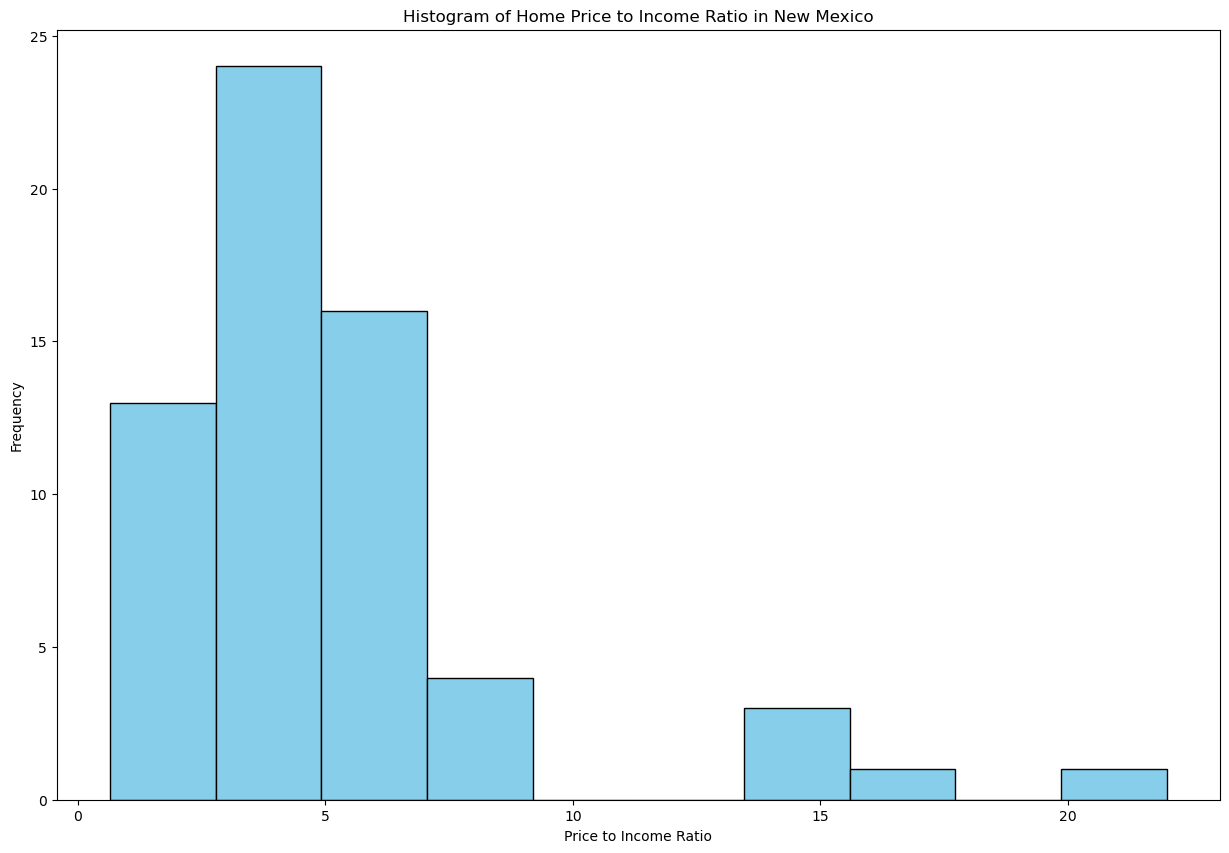

In [111]:
plt.figure(figsize=(15, 10))
plt.hist(NM_data["Price to Income Ratio"], bins=10, color='skyblue', edgecolor='black', align='mid')  

plt.xlabel('Price to Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Home Price to Income Ratio in New Mexico')

plt.savefig('./images/NM_histo.png')

plt.show()

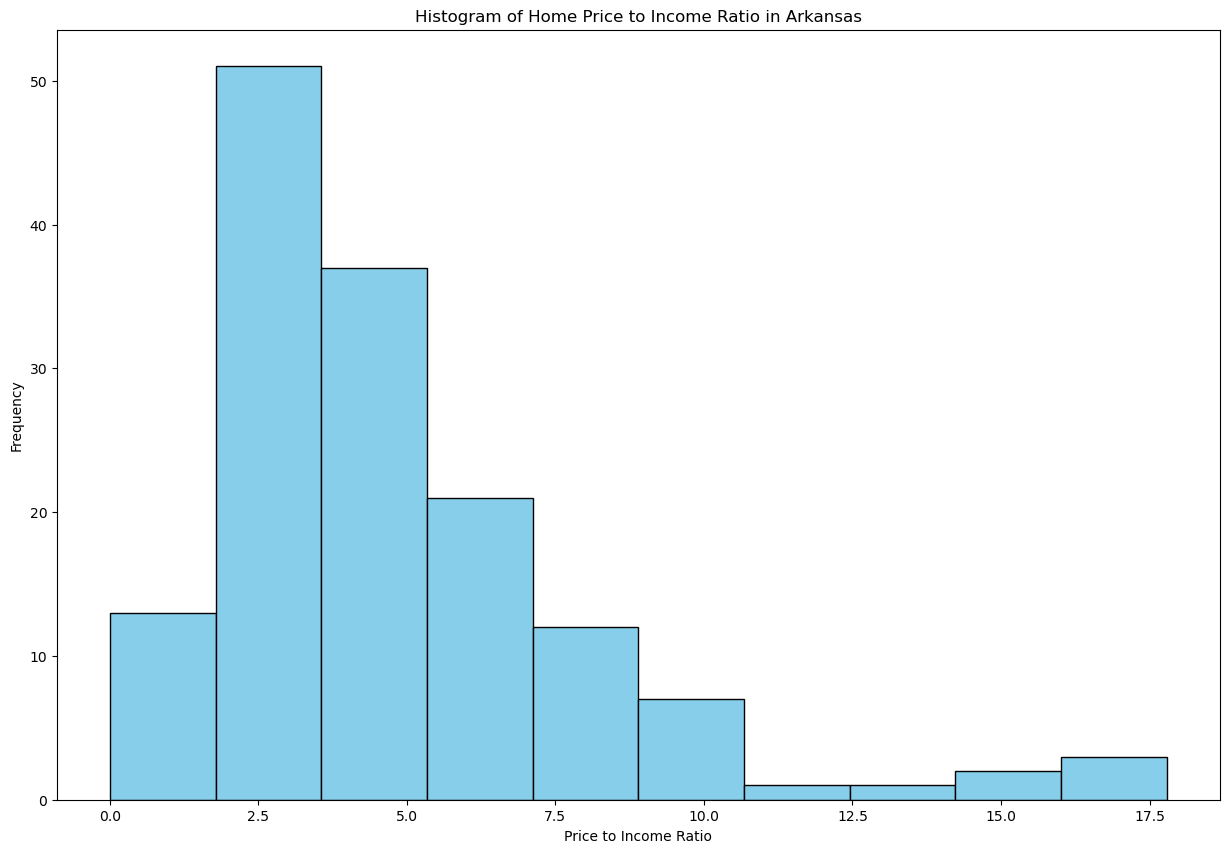

In [112]:
plt.figure(figsize=(15, 10))
plt.hist(AR_data["Price to Income Ratio"], bins=10, color='skyblue', edgecolor='black', align='mid')  

plt.xlabel('Price to Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Home Price to Income Ratio in Arkansas')

plt.savefig('./images/AR_histo.png')

plt.show()

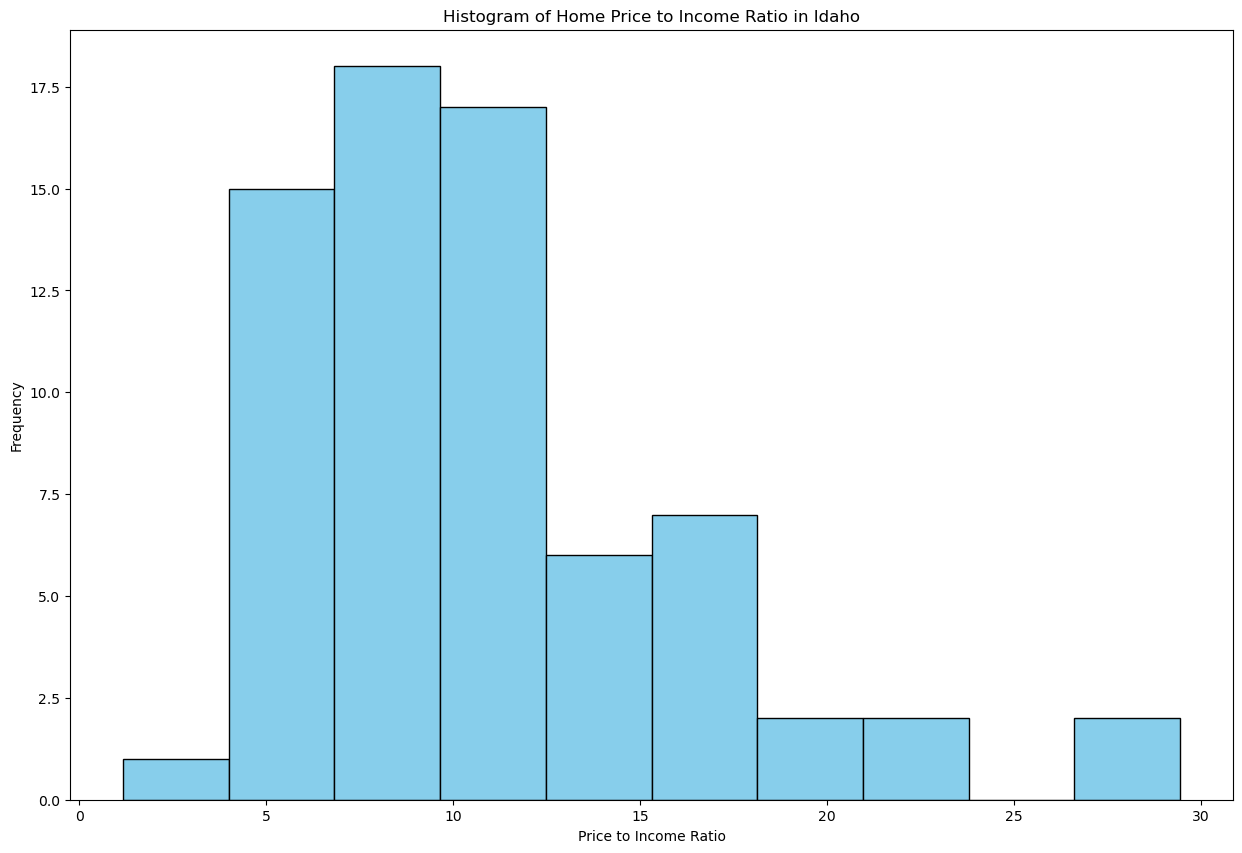

In [113]:
plt.figure(figsize=(15, 10))
plt.hist(ID_data["Price to Income Ratio"], bins=10, color='skyblue', edgecolor='black', align='mid')  

plt.xlabel('Price to Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Home Price to Income Ratio in Idaho')

plt.savefig('./images/ID_histo.png')

plt.show()

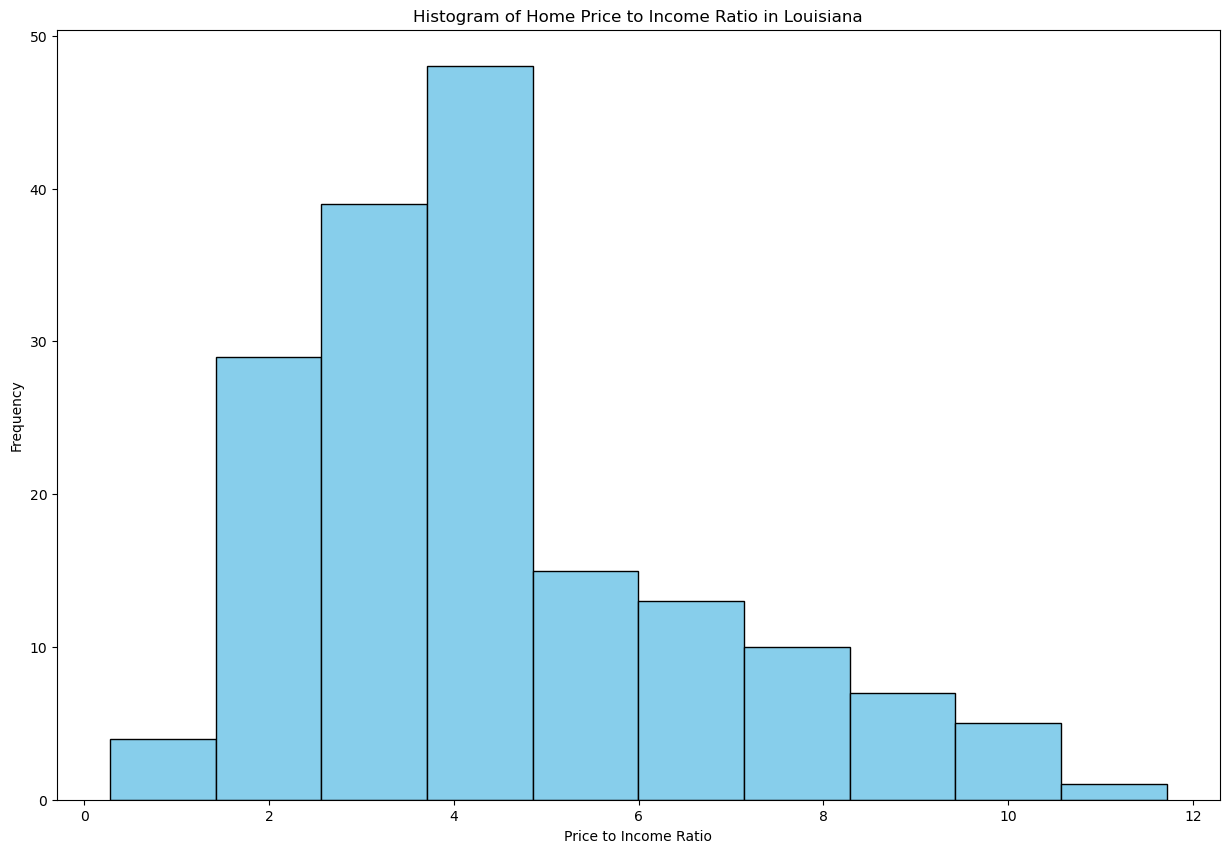

In [142]:
plt.figure(figsize=(15, 10))
plt.hist(LA_data["Price to Income Ratio"], bins=10, color='skyblue', edgecolor='black', align='mid')  

plt.xlabel('Price to Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Home Price to Income Ratio in Louisiana')

plt.savefig('./images/LA_histo.png')

plt.show()

In [54]:
# CA_data
# WA_data
# AK_data
# CO_data
# NM_data
# AR_data
# ID_data
# LA_data
